# <center>Data Science 2 - Assignment 2<center>
    
<center>Created by Zsófia Rebeka Katona<center>

---

### Assignment 2
#### 1.1 General information
You are required to submit two files to Moodle: an .ipynb file and the rendered .pdf file with
your solutions. Do not zip them together so I will be able to annotate the .pdf directly.
Please give short (2-3 sentences) interpretations / explanations to your answers, not only the
program code and outputs. Be concise and focused (less could be more ;)).
Grades will be distributed with the following rule: from the points you earn, you get 100% if you
submit until the due date (2024-04-05 20:00), 50% within 24 hours past due date, and 0% after
that.


#### 1.2 Classify fashion images on the MNIST data (20 points)
Take the alternative version of the famous “MNIST dataset”, which consists of images of Zalando’s
articles. Your task is to correctly classify the images into one of the ten categories, such as dress
or shirt. The images are in exactly the same format as we saw for the handwritten digits: 28x28
pixel grayscale images. The task is to build deep neural network models to predict the items. You
can use either sklearn or keras; to get the data, go to the corresponding Kaggle page or use
the fashion_mnist.load_data() function from the keras.datasets module. Make sure you split
the training set into two sets: one for training your models on and one for validation and model
selection. You can work with a relatively small train set if you have computational problems.

### What would be an appropriate metric to evaluate your models? Why? (Hint: No code required.) (2 points)
---
There are several ways to evaluate predictive models. However, the most appropriate metric could be using accuracy. Accuracy is important, as it shows the level of reliability and effectiveness of the predictive models. If we obtain a validation set during data splitting, we could also use validation accuracy, which tells us how well the models generalize to unseen data. Accuracy serves as a good indicator in predictive modeling, because it provides a clear indication of the model's ability to correctly classify instances, especially where the cost of misclassification is high.

### Get the data and show some example images from the data. (2 points) 

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Rescaling
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping

In [2]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Convert the output to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=20240405)

print(f"Size of training sets: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Size of validation sets: X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"Size of test sets: X_test:  {X_test.shape}, y_test:  {y_test.shape}")

Size of training sets: X_train: (48000, 28, 28), y_train: (48000, 10)
Size of validation sets: X_val:   (12000, 28, 28), y_val:   (12000, 10)
Size of test sets: X_test:  (10000, 28, 28), y_test:  (10000, 10)


Training images:


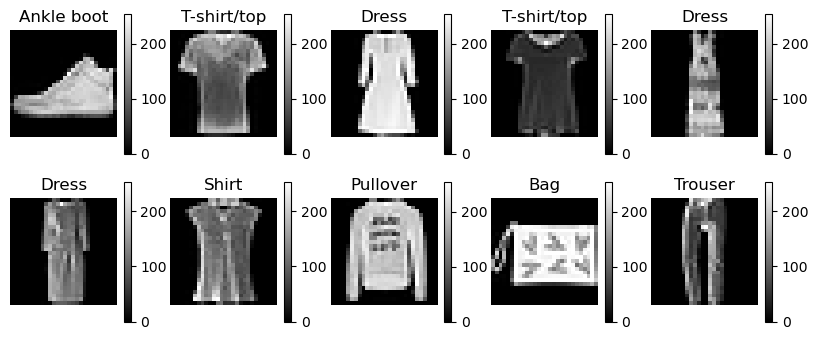

Validation images:


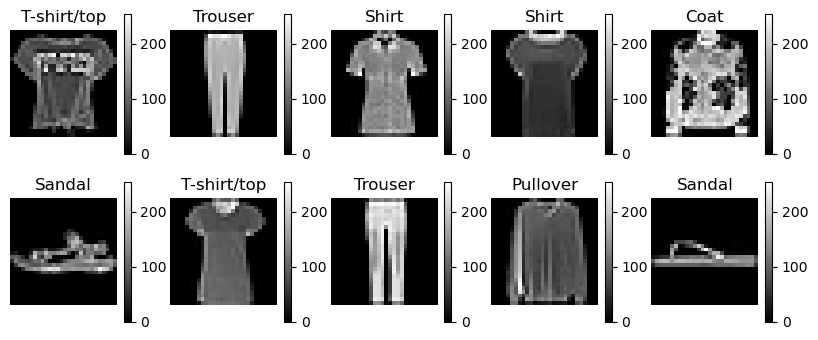

Test images:


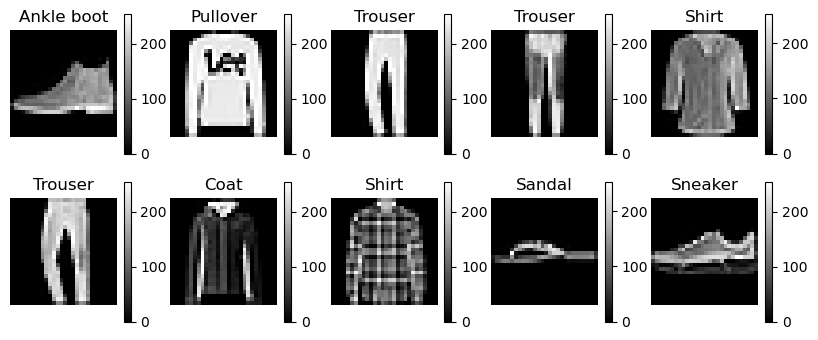

In [3]:
# Define class names for the labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Labelling the items with the clothing names
clothing_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

# Creating a list of datasets and their corresponding titles
datasets = [(X_train, y_train, "Training Images"), (X_val, y_val, "Validation Images"), (X_test, y_test, "Test Images")]

# Iterating over the training, validation and test datasets
def show_images(images, labels, nrows = 1, ncols = 5, class_names = None):
    """"Display the images and their labels"""
    plt.figure(figsize = (10, 2 * nrows))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i], cmap = "gray")
        plt.colorbar()
        if class_names is not None:
            plt.title(class_names[np.argmax(labels[i])])
        else:
            plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()

print("Training images:")
show_images(X_train, y_train, nrows = 2, ncols = 5, class_names = class_names)

print("Validation images:")
show_images(X_val, y_val, nrows = 2, ncols = 5, class_names = class_names)

print("Test images:")
show_images(X_test, y_test, nrows = 2, ncols = 5, class_names = class_names)

### Train a simple fully connected single hidden layer network to predict the items. Remember to normalize the data similar to what we did in class. Make sure that you use enough epochs so that the validation error begins to level off - provide a plot of the training history. (2 points) 

In [4]:
# Building a simple fully connected hidden layer network
model = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(256, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing the model summary
print(model.summary())

C:\Users\Zsófi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7768 - loss: 0.6346 - val_accuracy: 0.8487 - val_loss: 0.4085
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8629 - loss: 0.3814 - val_accuracy: 0.8680 - val_loss: 0.3555
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8745 - loss: 0.3422 - val_accuracy: 0.8711 - val_loss: 0.3589
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8894 - loss: 0.3039 - val_accuracy: 0.8686 - val_loss: 0.3713
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8940 - loss: 0.2891 - val_accuracy: 0.8745 - val_loss: 0.3575
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8951 - loss: 0.2806 - val_accuracy: 0.8883 - val_loss: 0.3129
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9032 - loss: 0.2593 - val_accuracy: 0.8816 - val_loss: 0.3233
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9052 - loss: 0.2516 - 

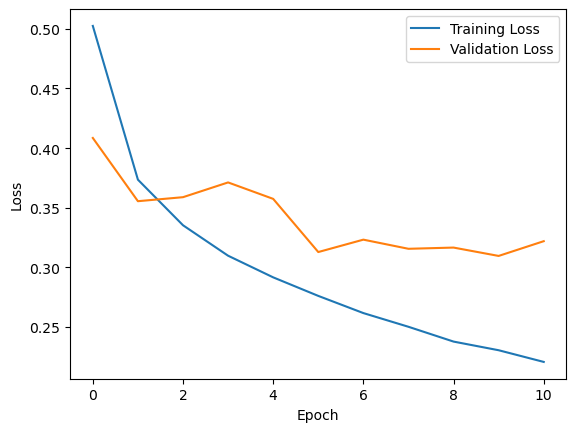

In [5]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

According to the plot, the training loss in consistently decreasing. It starts at 0,253 and decreases until 0.15 at the 24th epoch. The validation loss levels out after the 6th epoch, moving between 0.32 and 0.35. This suggests that the model might be overfitting to the training data, As we are going through the epoch, the accuracy is increasing. Due to the EarlyStopping, the model stops at the 24th epoch, when the validation accuary reaches 0.88, indicating that the model's performance on validation model has reached its peak. Despite the potential for overfitting, the model achieves a relatively good acuracy of 0.88. This indicates that the model generalizes well to unseen data.

### Experiment with different network architectures and settings (number of hidden layers, number of nodes, regularization, etc.). Train at least 3 models. Explain what you have tried and how it worked. (6 points) 

### Second model: Adding the Dropout
---

In [6]:
# Setting the network
model_2 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7368 - loss: 0.7527 - val_accuracy: 0.8413 - val_loss: 0.4340
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8288 - loss: 0.4700 - val_accuracy: 0.8585 - val_loss: 0.3854
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8440 - loss: 0.4316 - val_accuracy: 0.8601 - val_loss: 0.3758
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8518 - loss: 0.4018 - val_accuracy: 0.8627 - val_loss: 0.3689
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8560 - loss: 0.3962 - val_accuracy: 0.8698 - val_loss: 0.3498
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8637 - loss: 0.3791 - val_accuracy: 0.8728 - val_loss: 0.3427
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8650 - loss: 0.3667 - val_accuracy: 0.8772 - val_loss: 0.3338
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8668 - loss: 0.3611 - 

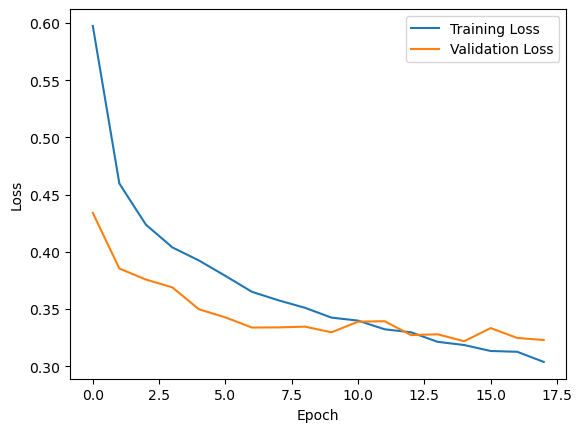

In [7]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_2 = model_2.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting training history
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The addition of a 0.5 Dropout layer to the model likely helped to regularize the model and prevent overfitting, as evidenced by the decrease in both training and validation loss. Dropout randomly sets a fraction of input units to 0 at each update during training, which can prevent the model from relying too heavily on any individual feature or combination of features.

The fluctuation in the validation loss after the 4th epoch could indicate that the model is adjusting to the dropout regularization and finding a better balance between fitting the training data and generalizing to unseen validation data.

The final training accuracy of 0.88 indicates that the model correctly classified 88% of the training examples, while the training loss of 0.32 suggests that the model's predictions were relatively close to the actual values in the training dataset.

Similarly, the validation accuracy of 0.88 indicates that the model performed well on unseen validation data, and the validation loss of 0.32 suggests that the model's predictions were reasonably accurate on this dataset as well.

Overall, the model appears to be well-regularized with dropout, as evidenced by the improvement in both training and validation loss convergence. The similar values of training and validation accuracy and loss indicate that the model is likely not overfitting and is performing consistently on both training and validation datasets.The addition of a 0.5 Dropout layer to the model likely helped to regularize the model and prevent overfitting, as evidenced by the decrease in both training and validation loss. Dropout randomly sets a fraction of input units to 0 at each update during training, which can prevent the model from relying too heavily on any individual feature or combination of features.

The fluctuation in the validation loss after the 4th epoch could indicate that the model is adjusting to the dropout regularization and finding a better balance between fitting the training data and generalizing to unseen validation data.

The final training accuracy of 0.88 indicates that the model correctly classified 88% of the training examples, while the training loss of 0.32 suggests that the model's predictions were relatively close to the actual values in the training dataset.

Similarly, the validation accuracy of 0.88 indicates that the model performed well on unseen validation data, and the validation loss of 0.32 suggests that the model's predictions were reasonably accurate on this dataset as well.

Overall, the model appears to be well-regularized with dropout, as evidenced by the improvement in both training and validation loss convergence. The similar values of training and validation accuracy and loss indicate that the model is likely not overfitting and is performing consistently on both training and validation datasets.

### Third model: Increasing the number of nodes
---

In [ ]:
# Setting the network
model_3 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    # Increasing the number of nodes
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling the deeper model
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_3.summary())

In [ ]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_3 = model_3.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting training history
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Fourth model: Increasing the number of layers with a sigmoid activation function
---

In [ ]:
# Setting the network
model_4 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(256, activation='relu'),
    # Adding another hidden layer with the sigmoid activation function
    Dense(256, activation = 'sigmoid'),
    Dense(10, activation='softmax')
])

# Compiling the model
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_4.summary())

In [ ]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_4 = model_4.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting training history
plt.plot(history_4.history['loss'], label='Training Loss')
plt.plot(history_4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Fifth model: Increasing the number of nodes, adding another layer and adding a learning rate to adam
---

In [ ]:
# Setting the network
model_5 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(512, activation='relu'),
    Dense(256, activation = 'relu'),
    Dense(10, activation='softmax')
])

# Compiling the model with a custom learning rate for Adam
adam_optimizer = Adam(learning_rate=0.001)
model_5.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print(model_5.summary())

In [ ]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_5 = model_5.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting training history
plt.plot(history_5.history['loss'], label='Training Loss')
plt.plot(history_5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### (6 points) Try to improve the accuracy of your model by using convolution. Train at least two different models (you can vary the number of convolutional and pooling layers or whether you include a fully connected layer before the output, etc.).

### 6th model: Increased depth
---

In [10]:
# Setting the network
model_6 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the second model
model_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_6.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6917 - loss: 0.8443 - val_accuracy: 0.8540 - val_loss: 0.3904
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.8570 - loss: 0.4026 - val_accuracy: 0.8838 - val_loss: 0.3120
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.8823 - loss: 0.3275 - val_accuracy: 0.8925 - val_loss: 0.2811
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8959 - loss: 0.2908 - val_accuracy: 0.9006 - val_loss: 0.2735
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9064 - loss: 0.2637 - val_accuracy: 0.8995 - val_loss: 0.2659
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9126 - loss: 0.2392 - val_accuracy: 0.9062 - val_loss: 0.2592
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9209 - loss: 0.2165 - val_accuracy: 0.9075 - val_loss: 0.2549
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9242 -

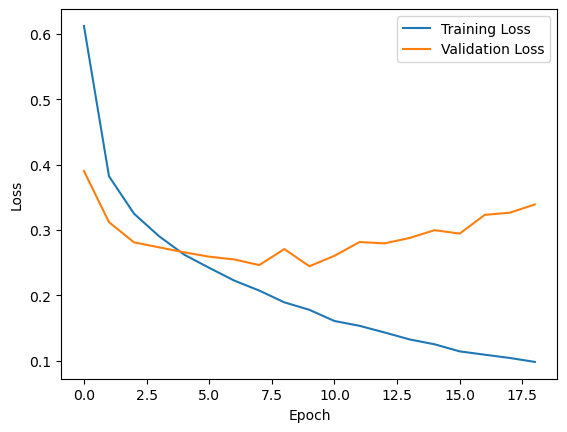

In [11]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_6 = model_6.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting training history
plt.plot(history_6.history['loss'], label='Training Loss')
plt.plot(history_6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 7th model: Increased Width
---

In [ ]:
# Setting the model
model_7 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the third model
model_7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_7.summary())

In [ ]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_7 = model_7.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting training history
plt.plot(history_7.history['loss'], label='Training Loss')
plt.plot(history_7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 8th model: Increased Depth and Width
---

In [ ]:
model_8 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the third model
model_8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_8.summary())

In [ ]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_8 = model_8.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting training history
plt.plot(history_8.history['loss'], label='Training Loss')
plt.plot(history_8.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### *(Optional for 5 points) Try to use a pre-trained network to improve accuracy*

### (2 points) Select a final model and evaluate it on the test set. How does the test error compare to the validation error?